## MULTIPLE LINEAR REGRESSION IMPLEMENTATION ON HOUSING DATASET

*   Author: Satabdi Mishra
*   Date: 25/07/2021



In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
dataset = pd.read_csv('Housing.csv')
df = dataset.copy()

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exploratory Data Analysis

In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
#Null Check

df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

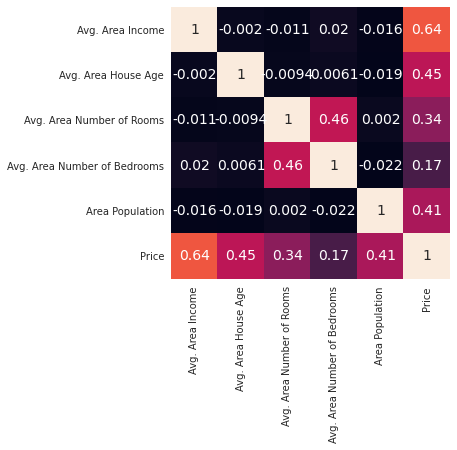

In [6]:
# Correlation Matrix

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()


1. Avg. Area Number of Rooms and Avg. Area Number of Bedrooms are highly correlated.
2. We can safely drop Avg. Area Number of Bedrooms .

In [7]:
#Dropping irrelevant columns

df = df.drop([ 'Avg. Area Number of Bedrooms' , 'Address'], axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


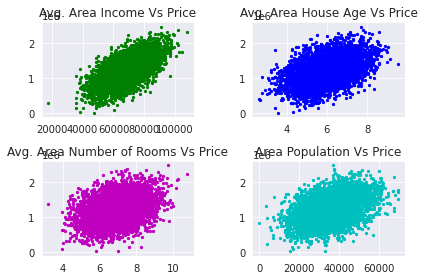

In [8]:
# Plotting the scatter plot of numerical variables

plt.subplot(2,2,1)
plt.title('Avg. Area Income Vs Price')
plt.scatter(df['Avg. Area Income'], df['Price'], s=5, c='g')

plt.subplot(2,2,2)
plt.title('Avg. Area House Age Vs Price')
plt.scatter(df['Avg. Area House Age'], df['Price'], s=5, c='b')

plt.subplot(2,2,3)
plt.title('Avg. Area Number of Rooms Vs Price')
plt.scatter(df['Avg. Area Number of Rooms'], df['Price'], s=5, c='m')

plt.subplot(2,2,4)
plt.title('Area Population Vs Price')
plt.scatter(df['Area Population'], df['Price'], s=5, c='c')

plt.tight_layout()

In [9]:
# Train Test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, :-1].values,df.iloc[:, -1].values, test_size = 0.2, random_state = 1)

In [10]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train

array([[-0.00459085,  0.34019443,  0.31658389, -0.06655832],
       [ 0.0043513 ,  1.38229023,  1.80034857,  0.77611159],
       [-1.01232663, -0.35507793,  0.612859  , -0.43530194],
       ...,
       [ 1.0744696 ,  0.47220765, -0.50062363, -0.96388508],
       [ 0.40420821, -0.76025073, -0.12850416,  0.32010633],
       [-0.1464465 , -0.76012179,  0.17431016, -1.10924664]])

In [12]:
X_test

array([[ 0.60331746,  0.7677568 , -0.38543973,  0.67967888],
       [ 0.71404856,  0.17836556,  0.17694434,  0.90219831],
       [-0.0931625 , -0.16555332, -1.92021845, -0.07828641],
       ...,
       [ 3.02813574, -0.10848513, -0.34488054, -1.01781722],
       [-0.54779776, -0.08824341, -0.50824779, -0.14962976],
       [-2.80307222,  0.99108744,  1.97952832, -1.07926153]])

### Model Fitting

In [13]:
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Predicting test data

Y_predict = std_reg.predict(X_test)

### Scoring the model

In [15]:
# RMSE Score

from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

rmse

102706.25983860242

In [16]:
# Adjusted R2 on train

ar2 = 1 - (1-std_reg.score(X_train, Y_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)

ar2

0.9169019487922683

In [17]:
#Adjusted R2 on test

ar2 = 1 - (1-std_reg.score(X_test, Y_test))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

ar2

0.9212411508227827

## THANK YOU